In [102]:
import pandas as pd
import numpy as np
from selenium import webdriver
from selenium.webdriver.common.by import By
import time


pd.set_option('display.max_columns', None)

In [176]:
def parse_title(book_data, cur_book_json):
    try:
        cur_book_json['book-name'] = book_data.find_element(By.CLASS_NAME, 'brow-book-name').text
        cur_book_json['cycle-title'] = book_data.find_element(By.CLASS_NAME, 'cycle-title').text
    except: 
        pass

def parse_author(book_data, cur_book_json):
    try:
        cur_book_json['book-author'] = book_data.find_element(By.CLASS_NAME, 'brow-book-author').text
    except: 
        pass

def parse_genres(book_data, cur_book_json):
    genres_list = []
    try:
        for genres in book_data.find_element(By.CLASS_NAME, 'brow-genres').find_elements(By.CLASS_NAME, 'label-genre'):
            genres_list.append(genres.text)
    except:
        pass
    cur_book_json['genres'] = genres_list

def parse_stats(book_data, cur_book_json):
    stat_dict = dict()
    try:
        for stat in book_data.find_element(By.CLASS_NAME, 'brow-stats').find_elements(By.TAG_NAME, 'a'):
            title = stat.get_attribute("title") 
            if title == 'Любят эту книгу':
                stat_dict['love'] = stat.text
            if 'рецензий' in title:
                stat_dict['review'] = stat.text
            if 'цитат' in title:
                stat_dict['citation'] = stat.text
            if 'прочитали' in title:
                stat_dict['read'] = stat.text.split()[0]
    except:
        pass
    
    cur_book_json['stats'] = stat_dict

def parse_details(book_data, cur_book_json):
    detail_dict = dict()
    try:
        for detail in book_data.find_element(By.CLASS_NAME, 'brow-details').find_element(By.TAG_NAME, 'table').find_elements(By.TAG_NAME, 'tr'):
            name, value = detail.find_elements(By.TAG_NAME, 'td')
            if name.text == 'Издательство:':
                try:
                    detail_dict[name.text[:-1]] = value.find_element(By.TAG_NAME, 'a').text
                except:
                    detail_dict[name.text[:-1]] = value.text
            else:
                detail_dict[name.text[:-1]] = value.text
    except:
        pass

    cur_book_json['details'] = detail_dict

def parse_abstract(book_data, cur_book_json):
    try: 
        cur_book_json['abstract'] = book_data.find_element(By.CLASS_NAME, 'brow-marg').find_element(By.TAG_NAME, 'p').text
    except:
        pass

In [168]:
driver = webdriver.Safari()

In [172]:
# book_json = []
len(book_json)


4116

In [166]:
driver.get(f"https://www.livelib.ru/genre/Фантастика/best/listview/biglist/~128")

In [177]:
start_time = time.time()

for i in range(215, 401):
    driver.get(f"https://www.livelib.ru/genre/Фантастика/best/listview/biglist/~{i}")
    books = driver.find_elements(By.CLASS_NAME, 'book-item-manage')
    for book in books:
        time.sleep(1)
        cur_book_json = {}
        book_data = book.find_element(By.CLASS_NAME, 'brow-data')

        parse_title(book_data, cur_book_json)
        parse_author(book_data, cur_book_json)
        parse_genres(book_data, cur_book_json)
        parse_stats(book_data, cur_book_json)
        parse_details(book_data, cur_book_json)
        parse_abstract(book_data, cur_book_json)

        book_json.append(cur_book_json)
    cur_time = time.time()
    print(f'Page: {i}, Loop time: {cur_time - start_time}')
    start_time = cur_time

Page: 215, Loop time: 36.222456216812134
Page: 216, Loop time: 35.44634485244751
Page: 217, Loop time: 38.068618059158325
Page: 218, Loop time: 34.78712606430054
Page: 219, Loop time: 36.31799292564392
Page: 220, Loop time: 37.05053210258484
Page: 221, Loop time: 37.686113595962524
Page: 222, Loop time: 36.44346642494202
Page: 223, Loop time: 35.45727276802063
Page: 224, Loop time: 36.356597900390625
Page: 225, Loop time: 35.46961998939514
Page: 226, Loop time: 35.62622809410095
Page: 227, Loop time: 36.283243894577026
Page: 228, Loop time: 34.49259614944458
Page: 229, Loop time: 38.75188589096069
Page: 230, Loop time: 39.67253828048706
Page: 231, Loop time: 61.35244584083557
Page: 232, Loop time: 36.71623611450195
Page: 233, Loop time: 49.709606885910034
Page: 234, Loop time: 38.04306507110596
Page: 235, Loop time: 36.23792290687561
Page: 236, Loop time: 36.009958028793335
Page: 237, Loop time: 35.28558897972107
Page: 238, Loop time: 33.165635108947754
Page: 239, Loop time: 34.2049438

In [184]:
book_json

[{'book-name': 'Цветы для Элджернона',
  'book-author': 'Дэниел Киз',
  'genres': ['Зарубежная фантастика', 'Зарубежная классика'],
  'stats': {'love': '7835',
   'review': '3082',
   'citation': '2791',
   'read': '120692'},
  'details': {'ISBN': '978-5-699-66017-9',
   'Год издания': '2015',
   'Издательство': 'Эксмо',
   'Серия': 'Интеллектуальный бестселлер (мини)',
   'Язык': 'Русский'},
  'abstract': 'Сорок лет назад это считалось фантастикой. \nСорок лет назад это читалось как фантастика. Исследующая и расширяющая границы жанра, жадно впитывающая всевозможные новейшие веяния, примеряющая общечеловеческое лицо, отважно игнорирующая каинову печать «жанрового гетто». \nСейчас это воспринимается как одно из самых человечных произведений новейшего времени, как роман пронзительной психологической силы, как филигранное развитие темы любви и ответственности. \nНе зря вышедшую уже в 1990-е книгу воспоминаний Киз назвал "Элджернон, Чарли и я".'},
 {'book-name': '451° по Фаренгейту',
  'bo

In [181]:
import pickle

In [182]:
with open('fantastic_livelib.pickle', 'wb') as f:
    pickle.dump(book_json, f)

In [185]:
driver.quit()

In [118]:
cur_book_json

{'book-name': 'Пять недель на воздушном шаре. Путешествие к центру Земли (сборник)',
 'book-author': 'Жюль Верн',
 'genres': ['Приключения', 'Зарубежная классика'],
 'stats': {'love': '5', 'review': '257', 'citation': '171', 'read': '174'},
 'details': {'ISBN': '5-85841-018-9',
  'Год издания': '1993',
  'Издательство': 'Сунгирь',
  'Язык': 'Русский'},
 'abstract': 'В обоих романах эксцентричные (как это всегда бывает у Жюля Верна, который обожал чудаков и авантюристов от науки) ученые со своими верными слугами и преданными товарищами отправляются в далеко не безопасные путешествия. Один пересекает Африку на воздушном шаре, другой устремляется через жерло вулкана к земному ядру.'}

In [120]:
len(book_json)

2498

AttributeError: 'WebElement' object has no attribute 'find_element_by_class_name'

In [188]:
from collections.abc import MutableMapping

def flatten_dict(d: MutableMapping, parent_key: str = '', sep: str ='.') -> MutableMapping:
    items = []
    for k, v in d.items():
        new_key = parent_key + sep + k if parent_key else k
        if isinstance(v, MutableMapping):
            items.extend(flatten_dict(v, new_key, sep=sep).items())
        else:
            items.append((new_key, v))
    return dict(items)

In [198]:
book_df_list = []
for book in book_json:
    book_flatten = flatten_dict(book, sep='_')
    book_flatten['genres'] = str(book_flatten['genres'])
    book_df_list.append(book_flatten)

In [201]:
book_df = pd.DataFrame().from_dict(book_df_list)

In [207]:
book_df['details_Язык'] = book_df['details_Язык'].fillna(book_df['details_Языки'])

In [210]:
book_df = book_df.drop(columns=['details_Языки'])

In [310]:
book_df['stats_love'] = book_df['stats_love'].astype(int)

In [338]:
book_df.to_pickle('fantastic_books.pickle')

In [319]:
import matplotlib.pyplot as plt

<AxesSubplot:>

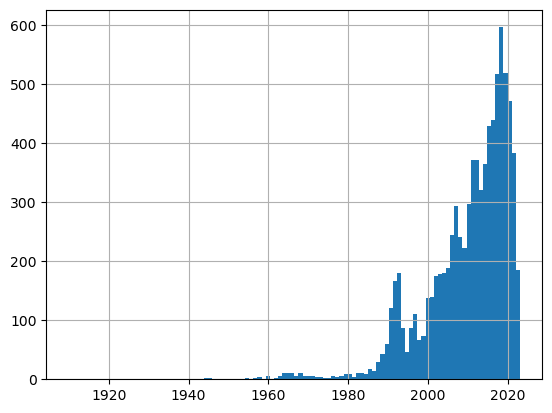

In [337]:
book_df['details_Год издания'] = pd.to_numeric(book_df['details_Год издания'])
book_df['details_Год издания'].hist(bins=110)

In [ ]:
import 

In [358]:
for col in ['stats_love','stats_review','stats_citation','stats_read']:
    book_df[col] = pd.to_numeric(book_df[col])

In [377]:
top_authors = (   
    book_df
    .groupby('book-author')
    [['stats_love','stats_review','stats_citation','stats_read', 'book-name']]
    .agg(
        {
            'stats_love': 'sum',
            'stats_review': 'sum',
            'stats_citation': 'sum',
            'stats_read': 'sum', 
            'book-name': 'nunique'
        }
    )
    .sort_values(by='stats_read', ascending=False)
    .reset_index()
    .rename(
        columns = {
            'book-author': 'Author',
            'stats_love': 'Likes (sum)',
            'stats_review': 'Reviews (sum)',
            'stats_citation': 'Citations (sum)',
            'stats_read': 'Read (sum)', 
            'book-name': 'Num of books'
        }
    )
    .head(7)
    # .style.format(precision = 0, thousands = ' ')
    # .to_clipboard()
)

In [380]:
top_authors = top_authors['Author'].values

In [381]:
top_authors

array(['Рэй Брэдбери', 'Аркадий и Борис Стругацкие', 'Джордж Оруэлл',
       'Сергей Лукьяненко', 'Дэниел Киз', 'Сьюзен Коллинз', 'Стивен Кинг'],
      dtype=object)

In [355]:
book_df.groupby('details_Издательство')['book-name'].count().sort_values(ascending=False).head(10)

details_Издательство
АСТ                        2060
Эксмо                      1685
Альфа-книга                 737
Азбука                      428
Фантастика Книжный Клуб     149
Fanzon                      130
Полярис                     116
ИДДК                        114
Центрполиграф               104
Эксмо-Пресс                 101
Name: book-name, dtype: int64

In [354]:
book_df
# разбить по жанрам прочитанное
# 

,book-name,book-author,genres,stats_love,stats_review,stats_citation,stats_read,details_ISBN,details_Год издания,details_Издательство,details_Серия,details_Язык,abstract,cycle-title
0,Цветы для Элджернона,Дэниел Киз,"['Зарубежная фантастика', 'Зарубежная классика']",7835,3082,2791,120692.0,978-5-699-66017-9,2015.0,Эксмо,Интеллектуальный бестселлер (мини),Русский,Сорок лет назад это считалось фантастикой. \nС...,NaN
1,451° по Фаренгейту,Рэй Брэдбери,"['Зарубежная фантастика', 'Зарубежная классика']",4893,2073,4339,111360.0,978-5-699-81254-7,2015.0,Эксмо,100 главных книг (покет),Русский,"451° по Фаренгейту - температура, при которой ...",NaN
2,1984,Джордж Оруэлл,"['Зарубежная фантастика', 'Зарубежная классика']",3856,1781,3117,92163.0,978-5-04-171583-0,2023.0,Like Book,Young Adult. Легендарные книги,Русский,Тоталитарное партийное государство Океания. Зд...,NaN
3,О дивный новый мир,Олдос Хаксли,"['Зарубежная классика', 'Зарубежная фантастика']",1719,1386,1639,57560.0,978-5-17-133241-9,2020.0,АСТ,КИНО!!,Русский,"""О дивный новый мир"" — изысканная и остроумная...",NaN
4,Мы,Евгений Замятин,"['Отечественная фантастика', 'Социальная фанта...",1183,1023,1539,42548.0,5-7107-1688-X,1998.0,Дрофа,Школьная программа,Русский,Знаменитый роман-антиутопия известного русског...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10117,Княжья служба,Юрий Корчевский,['Отечественная фантастика'],0,0,0,23.0,978-5-9942-0345-3,2009.0,Лениздат,Атаман,Русский,"Волею случая наш современник, врач Юрий Котлов...","Цикл «Атаман», №2"
10118,Ангелы крови,Максим Макаренков,['Отечественная фантастика'],1,NaN,3,27.0,978-5-9942-0120-6,2008.0,Лениздат,Боевая фантастика,Русский,"Мир, в котором отгремели войны богов, вздохнул...",NaN
10119,Гавань Командора,Алексей Волков,['Отечественная фантастика'],1,NaN,0,24.0,5-9717-0442-7,2007.0,Крылов,Историческая авантюра,Русский,Нелегок путь на родину. \n Бывшие пассажиры кр...,"Цикл «Командор», №4"
10120,Солдат императора,Клим Жуков,['Отечественная фантастика'],3,0,1,23.0,978-5-699-41851-0,2010.0,Эксмо,Абсолютное оружие,Русский,Невинная шалость с дочерью главы Академии гума...,NaN


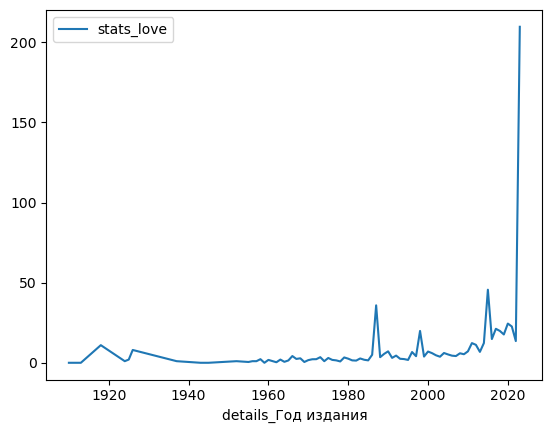

In [333]:
fig, ax = plt.subplots()

for el in ['stats_love']:

    book_df.pivot_table(
        index='details_Год издания',
        values=el, 
        aggfunc='mean'
    ).plot(ax=ax)

In [269]:
# driver.quit()
driver = webdriver.Safari()

In [270]:
ISBN = '978-5-699-66017-9'	
driver.get(f"https://www.livelib.ru/book/{ISBN}")
driver.execute_script("window.scrollTo(0, 900)") 

In [228]:
rating = driver.find_element(By.CLASS_NAME, 'bc-rating-medium').get_attribute('title')

In [303]:
book_markets = driver.find_element(By.ID, 'sources-api-ajax')#.find_element(By.CLASS_NAME, 'prlstores')#.find_element(By.CSS_SELECTOR, "[class='prlstores-type prlstores-type--wb1']")
# [el.get_attribute('data-store') for el in book_markets]

In [292]:
from bs4 import BeautifulSoup as bs

In [305]:
soup = bs(book_markets.get_attribute('outerHTML'))
print(soup.prettify())

<html>
 <body>
  <div id="sources-api-ajax" style="display: block;">
   <iframe data-book_id="459282" id="source-api-iframe" src="/book/getpriceblock?apikey=e63c683a3cd6a4c41e82dc4b718e0ff8&amp;edition_id=1000703959" style="width: 100%; height: 576px;">
   </iframe>
  </div>
 </body>
</html>


'<html>\n <body>\n  <div class="ajax-side-block">\n   <a class="prlstores-type__item" data-store="book24" href="https://www.pricelib.ru/1000703959/239681175o014636668" onclick="wantstobuy_bookshop_click(\'book24\', 1000703959, \'\');" rel="nofollow" style="float: left;" target="_blank" title="Купить в Book24.ru">\n    <img alt="Купить в Book24.ru" class="prlstores-type__img" rel="nofollow" src="https://s1.livelib.ru/boocover/1000703959/100/f262/Deniel_Kiz__Tsvety_dlya_Eldzhernona.jpg" style="background-color: #ffffff;float: left;width: 90px;" target="_blank"/>\n   </a>\n   <div class="wordbreak" style="padding-left: 95px;">\n    <div class="context-ads-text">\n     <div>\n      <a class="prlstores-type__item" data-store="book24" href="https://www.pricelib.ru/1000703959/239681175o014636668" onclick="wantstobuy_bookshop_click(\'book24\', 1000703959, \'\');" rel="nofollow" target="_blank">\n       Купить бумажную книгу\n      </a>\n      <br/>\n     </div>\n     <div class="text">\n      

In [ ]:
init = [1, 2, 3, 4, 5, 6]
x = [2, 3, 1, 5, 6, 4]



# Word could 

In [382]:
%pip install WordCloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 3.1 MB/s eta 0:00:00 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [395]:
author_abstracts = {}
for author in top_authors:
    author_abstracts[author] = book_df[book_df['book-author'] == author]['abstract'].str.lower().dropna().values

In [473]:
with open('stop_words.txt', 'r') as f:
    stop_words = [line.strip('\n') for line in f.readlines()]

In [474]:
stop_words
stopwords = set(stop_words)

Рэй Брэдбери


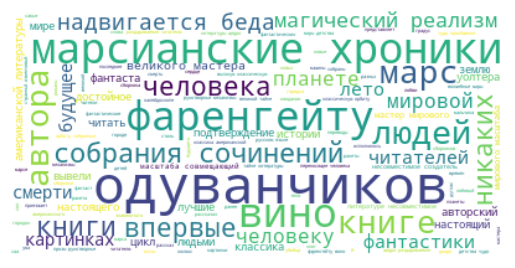

Аркадий и Борис Стругацкие


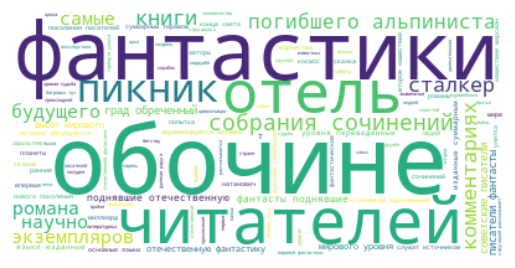

Джордж Оруэлл


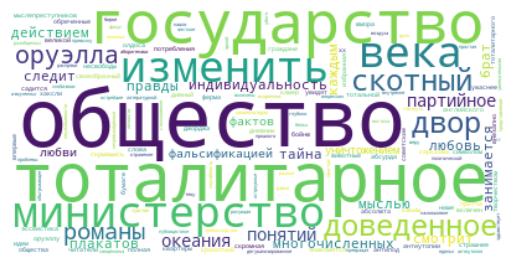

Сергей Лукьяненко


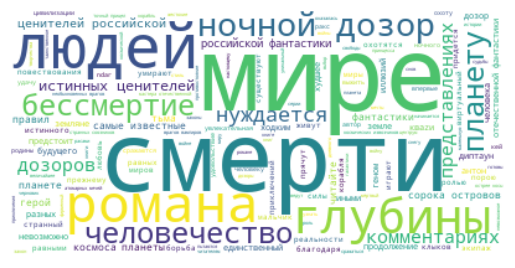

Дэниел Киз


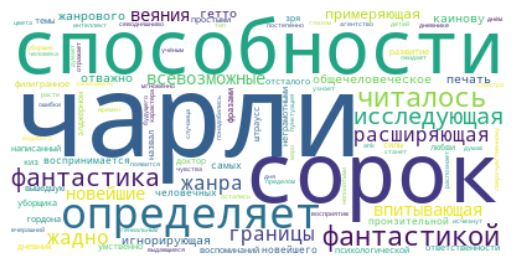

Сьюзен Коллинз


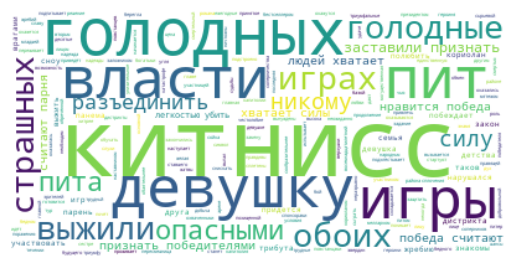

Стивен Кинг


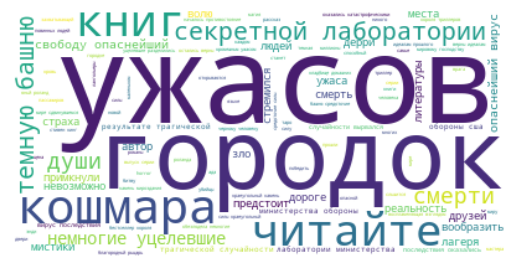

In [475]:
world_cloud_author = {}
for author in author_abstracts: 
    author_abstr_combined = ''
    for abstract in author_abstracts[author]:
        author_abstr_combined += abstract
        author_abstr_combined += ' ' 

    # Generate a word cloud image
    wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(author_abstr_combined)

    # Display the generated image:
    # the matplotlib way:
    print(author)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    wordcloud.to_file(f'wordclouds/{author}.png')

In [418]:
book_df

,book-name,book-author,genres,stats_love,stats_review,stats_citation,stats_read,details_ISBN,details_Год издания,details_Издательство,details_Серия,details_Язык,abstract,cycle-title
0,Цветы для Элджернона,Дэниел Киз,"['Зарубежная фантастика', 'Зарубежная классика']",7835,3082.0,2791,120692.0,978-5-699-66017-9,2015.0,Эксмо,Интеллектуальный бестселлер (мини),Русский,Сорок лет назад это считалось фантастикой. \nС...,NaN
1,451° по Фаренгейту,Рэй Брэдбери,"['Зарубежная фантастика', 'Зарубежная классика']",4893,2073.0,4339,111360.0,978-5-699-81254-7,2015.0,Эксмо,100 главных книг (покет),Русский,"451° по Фаренгейту - температура, при которой ...",NaN
2,1984,Джордж Оруэлл,"['Зарубежная фантастика', 'Зарубежная классика']",3856,1781.0,3117,92163.0,978-5-04-171583-0,2023.0,Like Book,Young Adult. Легендарные книги,Русский,Тоталитарное партийное государство Океания. Зд...,NaN
3,О дивный новый мир,Олдос Хаксли,"['Зарубежная классика', 'Зарубежная фантастика']",1719,1386.0,1639,57560.0,978-5-17-133241-9,2020.0,АСТ,КИНО!!,Русский,"""О дивный новый мир"" — изысканная и остроумная...",NaN
4,Мы,Евгений Замятин,"['Отечественная фантастика', 'Социальная фанта...",1183,1023.0,1539,42548.0,5-7107-1688-X,1998.0,Дрофа,Школьная программа,Русский,Знаменитый роман-антиутопия известного русског...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10117,Княжья служба,Юрий Корчевский,['Отечественная фантастика'],0,0.0,0,23.0,978-5-9942-0345-3,2009.0,Лениздат,Атаман,Русский,"Волею случая наш современник, врач Юрий Котлов...","Цикл «Атаман», №2"
10118,Ангелы крови,Максим Макаренков,['Отечественная фантастика'],1,NaN,3,27.0,978-5-9942-0120-6,2008.0,Лениздат,Боевая фантастика,Русский,"Мир, в котором отгремели войны богов, вздохнул...",NaN
10119,Гавань Командора,Алексей Волков,['Отечественная фантастика'],1,NaN,0,24.0,5-9717-0442-7,2007.0,Крылов,Историческая авантюра,Русский,Нелегок путь на родину. \n Бывшие пассажиры кр...,"Цикл «Командор», №4"
10120,Солдат императора,Клим Жуков,['Отечественная фантастика'],3,0.0,1,23.0,978-5-699-41851-0,2010.0,Эксмо,Абсолютное оружие,Русский,Невинная шалость с дочерью главы Академии гума...,NaN


# Жанры

In [472]:
book_df

,book-name,book-author,genres,stats_love,stats_review,stats_citation,stats_read,details_ISBN,details_Год издания,details_Издательство,details_Серия,details_Язык,abstract,cycle-title
0,Цветы для Элджернона,Дэниел Киз,"['Зарубежная фантастика', 'Зарубежная классика']",7835,3082.0,2791,120692.0,978-5-699-66017-9,2015.0,Эксмо,Интеллектуальный бестселлер (мини),Русский,Сорок лет назад это считалось фантастикой. \nС...,NaN
1,451° по Фаренгейту,Рэй Брэдбери,"['Зарубежная фантастика', 'Зарубежная классика']",4893,2073.0,4339,111360.0,978-5-699-81254-7,2015.0,Эксмо,100 главных книг (покет),Русский,"451° по Фаренгейту - температура, при которой ...",NaN
2,1984,Джордж Оруэлл,"['Зарубежная фантастика', 'Зарубежная классика']",3856,1781.0,3117,92163.0,978-5-04-171583-0,2023.0,Like Book,Young Adult. Легендарные книги,Русский,Тоталитарное партийное государство Океания. Зд...,NaN
3,О дивный новый мир,Олдос Хаксли,"['Зарубежная классика', 'Зарубежная фантастика']",1719,1386.0,1639,57560.0,978-5-17-133241-9,2020.0,АСТ,КИНО!!,Русский,"""О дивный новый мир"" — изысканная и остроумная...",NaN
4,Мы,Евгений Замятин,"['Отечественная фантастика', 'Социальная фанта...",1183,1023.0,1539,42548.0,5-7107-1688-X,1998.0,Дрофа,Школьная программа,Русский,Знаменитый роман-антиутопия известного русског...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10117,Княжья служба,Юрий Корчевский,['Отечественная фантастика'],0,0.0,0,23.0,978-5-9942-0345-3,2009.0,Лениздат,Атаман,Русский,"Волею случая наш современник, врач Юрий Котлов...","Цикл «Атаман», №2"
10118,Ангелы крови,Максим Макаренков,['Отечественная фантастика'],1,NaN,3,27.0,978-5-9942-0120-6,2008.0,Лениздат,Боевая фантастика,Русский,"Мир, в котором отгремели войны богов, вздохнул...",NaN
10119,Гавань Командора,Алексей Волков,['Отечественная фантастика'],1,NaN,0,24.0,5-9717-0442-7,2007.0,Крылов,Историческая авантюра,Русский,Нелегок путь на родину. \n Бывшие пассажиры кр...,"Цикл «Командор», №4"
10120,Солдат императора,Клим Жуков,['Отечественная фантастика'],3,0.0,1,23.0,978-5-699-41851-0,2010.0,Эксмо,Абсолютное оружие,Русский,Невинная шалость с дочерью главы Академии гума...,NaN


# Года издания книг

<AxesSubplot:xlabel='details_Год издания'>

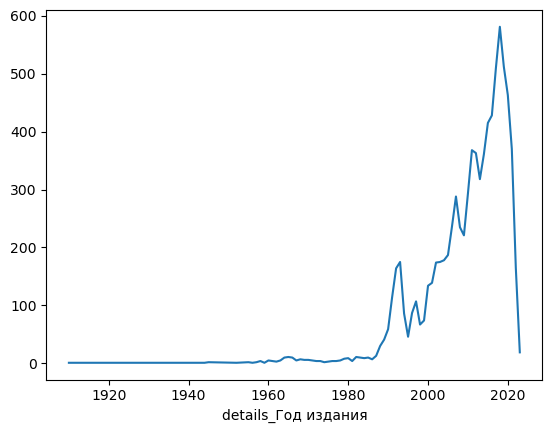

In [468]:
(
    book_df
    .groupby('details_Год издания')
    ['book-name']
    .nunique() 
    .rename('')
).plot(kind='bar')